In [1]:
# perform Naive Bayes classification to investigate how different categories of McDonald's stores are perceived by customers
#category analysis

import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# LET'S DOWNLOAD NLTK RESOURCES
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')

# DATAPATH
data_path = r"C:\Users\nh013\Desktop\MC''donald\McDonald_s_Reviews.csv"
df = pd.read_csv(data_path, encoding='latin1')

#FUNCTION OF PREPROCESSING
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [token.lower() for token in tokens if token.isalpha()]
    tokens = [token for token in tokens if token not in stop_words]
    tokens = [lemmatizer.lemmatize(token, get_wordnet_pos(token)) for token in tokens]
    processed_text = ' '.join(tokens)
    return processed_text

def get_wordnet_pos(token):
    tag = nltk.pos_tag([token])[0][1][0].upper()
    tag_dict = {
        'J': wordnet.ADJ,
        'N': wordnet.NOUN,
        'V': wordnet.VERB,
        'R': wordnet.ADV
    }
    return tag_dict.get(tag, wordnet.NOUN)

# PREPROCESSING TO THR REVIEW COLOUMN
df['review'] = df['review'].apply(preprocess_text)

# SENTIMENT ANALYSIS USING VADER
def calculate_sentiment(text):
    sid = SentimentIntensityAnalyzer()
    sentiment = sid.polarity_scores(text)['compound']
    return sentiment

df['sentiment'] = df['review'].apply(calculate_sentiment)


# CLASSIFY SENTIMENT AS POSSITIVE OR NEGATIVE
df['sentiment_category'] = df['sentiment'].apply(lambda x: 'Positive' if x > 0 else 'Negative')


#SPILT DATA INTO TRAINING AND TSTING SET
X = df['review']
y = df['sentiment_category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# VECTORIZE THE TEXT DATA USING COUNT VECTORIZED
vectorizer = CountVectorizer()
X_train_vectors = vectorizer.fit_transform(X_train)
X_test_vectors = vectorizer.transform(X_test)

# TRAIN MODEL 
classifier = MultinomialNB()
classifier.fit(X_train_vectors, y_train)

# MAKE PREDICTION ON TEST SET
y_pred = classifier.predict(X_test_vectors)

# EVALUATE
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nh013\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nh013\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\nh013\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\nh013\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Accuracy: 0.8516467065868264
Classification Report:
               precision    recall  f1-score   support

    Negative       0.86      0.78      0.82      2867
    Positive       0.85      0.91      0.87      3813

    accuracy                           0.85      6680
   macro avg       0.85      0.84      0.85      6680
weighted avg       0.85      0.85      0.85      6680



In [2]:

#sentiment analysis unsing SVM ......

import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# LET'S DOWNLOAD NLTK RESOURCES
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')

# DATAPATH
data_path = r"C:\Users\nh013\Desktop\MC''donald\McDonald_s_Reviews.csv"
df = pd.read_csv(data_path, encoding='latin1')

# FUNCTION FOR PREPROCESSING 
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [token.lower() for token in tokens if token.isalpha()]
    tokens = [token for token in tokens if token not in stop_words]
    tokens = [lemmatizer.lemmatize(token, get_wordnet_pos(token)) for token in tokens]
    processed_text = ' '.join(tokens)
    return processed_text

def get_wordnet_pos(token):
    tag = nltk.pos_tag([token])[0][1][0].upper()
    tag_dict = {
        'J': wordnet.ADJ,
        'N': wordnet.NOUN,
        'V': wordnet.VERB,
        'R': wordnet.ADV
    }
    return tag_dict.get(tag, wordnet.NOUN)



# PREPROCESSING TO THE REVIEW COLUMN
df['review'] = df['review'].apply(preprocess_text)



#SENTIMENT ANALYSIS USING VADER
def calculate_sentiment(text):
    sid = SentimentIntensityAnalyzer()
    sentiment = sid.polarity_scores(text)['compound']
    return sentiment

df['sentiment'] = df['review'].apply(calculate_sentiment)



# CLASSIFY SENTIMENT AS NEGATIVE OR POSSITVE
df['sentiment_category'] = df['sentiment'].apply(lambda x: 'Positive' if x > 0 else 'Negative')



# SPLIT DATA INTO TRAINING AND TESTING SET
X = df['review']
y = df['sentiment_category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#CONVERT TEXT DATA TO NUMERICAL FEATURES USING TF-IDF VECTORIZATION
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# TRAIN MODEL
svm = SVC(kernel='linear')
svm.fit(X_train_vectorized, y_train)

# MAKE PREDICTION ON THE TEST SET
y_pred = svm.predict(X_test_vectorized)

# EVALUATE MODEL
print(classification_report(y_test, y_pred))


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nh013\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nh013\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\nh013\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\nh013\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


              precision    recall  f1-score   support

    Negative       0.94      0.96      0.95      2867
    Positive       0.97      0.95      0.96      3813

    accuracy                           0.96      6680
   macro avg       0.95      0.96      0.96      6680
weighted avg       0.96      0.96      0.96      6680



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nh013\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nh013\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\nh013\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\nh013\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Accuracy: 0.8516467065868264
Classification Report:
               precision    recall  f1-score   support

    Negative       0.86      0.78      0.82      2867
    Positive       0.85      0.91      0.87      3813

    accuracy                           0.85      6680
   macro avg       0.85      0.84      0.85      6680
weighted avg       0.85      0.85      0.85      6680



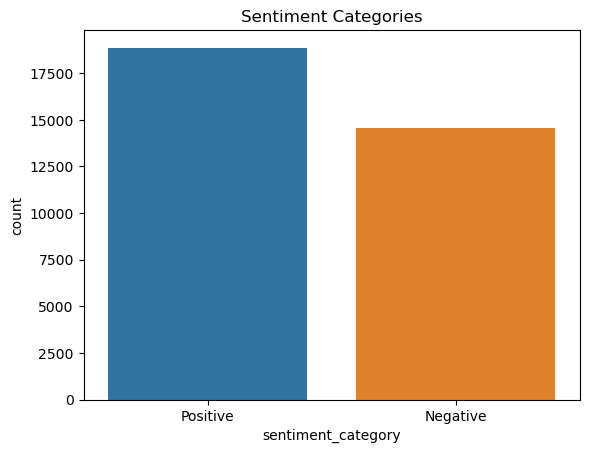

In [3]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# LET'S DOWNLOAD NLTK RESOURCES
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')

# DATAPATH
data_path = r"C:\Users\nh013\Desktop\MC''donald\McDonald_s_Reviews.csv"
df = pd.read_csv(data_path, encoding='latin1')

#FUNCTION OF PREPROCESSING
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [token.lower() for token in tokens if token.isalpha()]
    tokens = [token for token in tokens if token not in stop_words]
    tokens = [lemmatizer.lemmatize(token, get_wordnet_pos(token)) for token in tokens]
    processed_text = ' '.join(tokens)
    return processed_text

def get_wordnet_pos(token):
    tag = nltk.pos_tag([token])[0][1][0].upper()
    tag_dict = {
        'J': wordnet.ADJ,
        'N': wordnet.NOUN,
        'V': wordnet.VERB,
        'R': wordnet.ADV
    }
    return tag_dict.get(tag, wordnet.NOUN)

# PREPROCESSING TO THR REVIEW COLOUMN
df['review'] = df['review'].apply(preprocess_text)

# SENTIMENT ANALYSIS USING VADER
def calculate_sentiment(text):
    sid = SentimentIntensityAnalyzer()
    sentiment = sid.polarity_scores(text)['compound']
    return sentiment

df['sentiment'] = df['review'].apply(calculate_sentiment)


# CLASSIFY SENTIMENT AS POSSITIVE OR NEGATIVE
df['sentiment_category'] = df['sentiment'].apply(lambda x: 'Positive' if x > 0 else 'Negative')


#SPILT DATA INTO TRAINING AND TSTING SET
X = df['review']
y = df['sentiment_category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# VECTORIZE THE TEXT DATA USING COUNT VECTORIZED
vectorizer = CountVectorizer()
X_train_vectors = vectorizer.fit_transform(X_train)
X_test_vectors = vectorizer.transform(X_test)

# TRAIN MODEL 
classifier = MultinomialNB()
classifier.fit(X_train_vectors, y_train)

# MAKE PREDICTION ON TEST SET
y_pred = classifier.predict(X_test_vectors)

# EVALUATE
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)


# VISUALIZE SENTIMENT CATEGORIES
sns.countplot(data=df, x='sentiment_category')
plt.title("Sentiment Categories")
plt.show()
